# 填充

在应用多层卷积时，我们常常丢失边缘像素。 由于我们通常使用小卷积核，因此对于任何单个卷积，我们可能只会丢失几个像素。 但随着我们应用许多连续卷积层，累积丢失的像素数就多了。 解决这个问题的简单方法即为填充（padding）：在输入图像的边界填充元素（通常填充元素是0）


填充会让我们得到更大的结果



在输入的周围添加额外的行/列
将3x3的填充0到5x5 不填充的情况下只能得到2x2的
那么输出就增加为了得到4x4
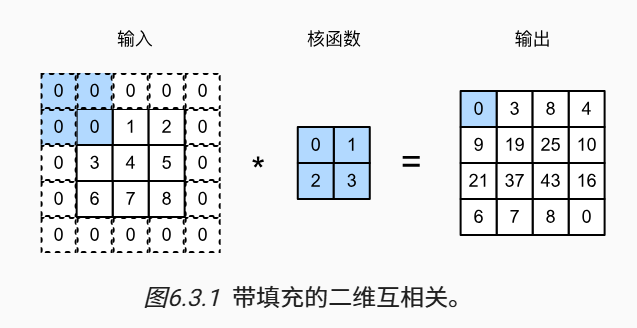


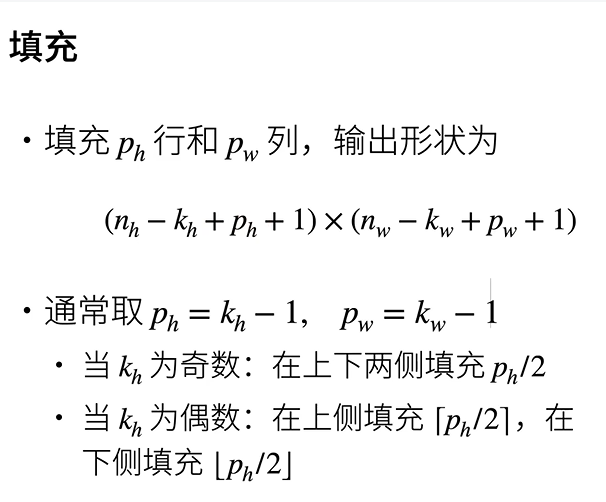


# 步幅

滑动窗口每次默认是使用高度或宽度为1的步幅
将每次滑动元素的数量称为步幅

在计算互相关时，卷积窗口从输入张量的左上角开始，向下、向右滑动。 在前面的例子中，我们默认每次滑动一个元素。 但是，有时候为了高效计算或是缩减采样次数，卷积窗口可以跳过中间位置，每次滑动多个元素。

为了计算输出中第一列的第二个元素和第一行的第二个元素，卷积窗口分别向下滑动三行和向右滑动两列。但是，当卷积窗口继续向右滑动两列时，没有输出，因为输入元素无法填充窗口（除非我们添加另一列填充）。

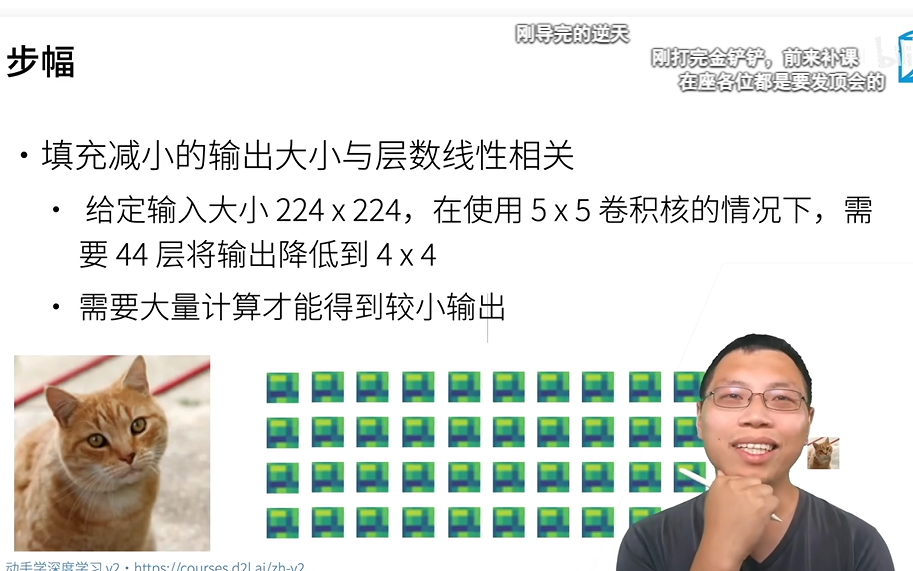

要快速减小大小 上例要用44层卷积神经网络

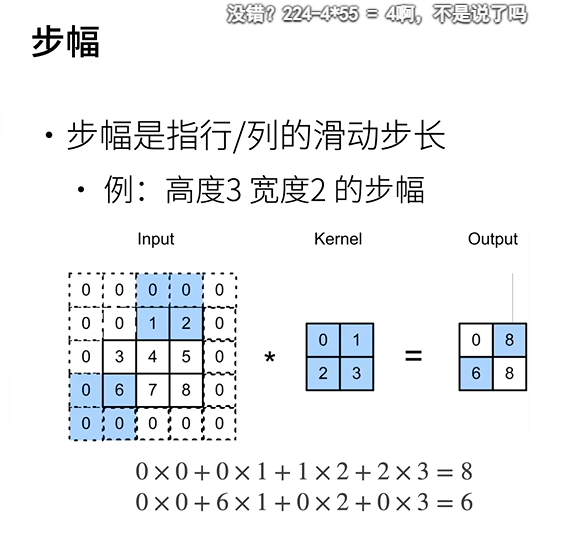

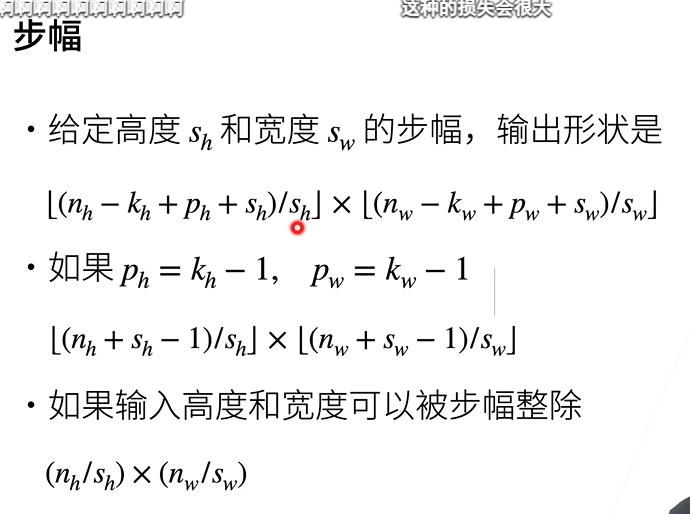

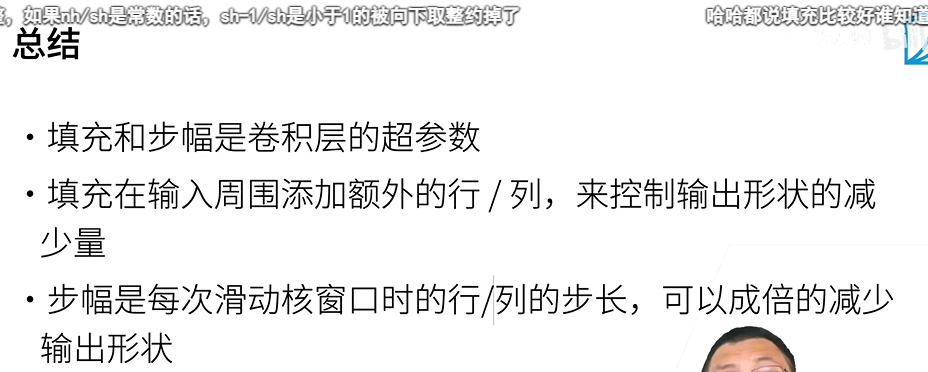

In [9]:
#在所有侧边填充一个像素
import torch
from torch import nn


X.reshape((1, 1) + X.shape):

# reshape 方法用于改变张量的形状。这里将 X 的形状从 (8, 8) 调整为 (1, 1, 8, 8)。
# 这样做的目的是使得 X 适用于卷积层的输入格式。
# 卷积层在 PyTorch 中期望输入的数据格式为 (batch_size, channels, height, width)
# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X) #nn.Conv2d()类作为二维卷积的实现
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape


torch.Size([8, 8])

In [7]:
#当卷积核的高度和宽度不同时，我们可以填充不同的高度和宽度，
# 使输出和输入具有相同的高度和宽度。在如下示例中，
# 我们使用高度为5，宽度为3的卷积核，高度和宽度两边的填充分别为2和1
X = torch.rand(size=(8, 8))
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1)) 
#1，1即输入和输出的数据量大小
# 核行数5行列数3列 
#padding参数就是填充的参数 填充上下填充2 左右填充1
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [5]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [8]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

In [11]:
# 步幅大于1的优势在于可以快速的降低输出的维数